In [1]:
import sys
sys.path.append('../scripts')
import data_prep

In [2]:
import matplotlib.pyplot as plt 
from data_prep import data_prep
import seaborn as sns

Importing the data

In [3]:
df = data_prep.load_data("../src/data/MachineLearningRating_v3.txt")

c:\Users\Excellerent55\Desktop\samri folder\Insurance_Risk_prediction-\notebooks\../scripts\data_prep.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="|")


Execution completed


In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [8]:
df["TotalPremium"].describe()

count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64

(array([1.000086e+06, 0.000000e+00, 0.000000e+00, 6.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 6.000000e+00]),
 array([ -782.57675439,  5823.94126316, 12430.4592807 , 19036.97729825,
        25643.49531579, 32250.01333333, 38856.53135088, 45463.04936842,
        52069.56738596, 58676.08540351, 65282.60342105]),
 <BarContainer object of 10 artists>)

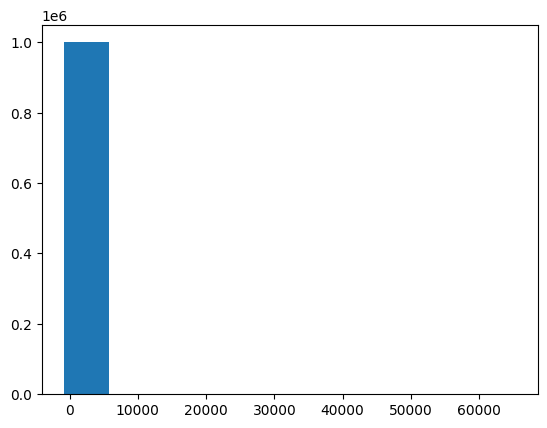

In [9]:
plt.hist(df["TotalPremium"])

In [10]:
df[df["TotalPremium"] == 0]["TotalClaims"].value_counts()

TotalClaims
0.000000        381484
6140.350877         22
850.000000           6
750.649123           3
2294.096491          2
                 ...  
2156.701754          1
18719.903509         1
4436.000000          1
43228.070175         1
7996.535088          1
Name: count, Length: 115, dtype: int64

- Highly abnormal case 
you’re seeing claims being paid without any premium collected.

This might indicate:

A data error

A manual override in claim processing

Policy backdating or administrative issue
- Likely means no policy was written and no claim occurred — this is a neutral or inactive case when claim and premium equals to zero.

In [11]:
data_prep.loss_ratio(df)

In [12]:
df.isnull().sum().sort_values(ascending=False)

NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
WrittenOff                   641901
Converted                    641901
Rebuilt                      641901
LossRatio                    381634
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
VehicleIntroDate                552
VehicleType                     552
Cylinders                       552
make                            552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors                   552
mmcode                          552
Model                           552
CapitalOutstanding                2
MainCrestaZone                    0
ItemType                          0
PostalCode                        0
Province                          0
LegalType                   

In [13]:
df["LossRatio"].describe()

count    618464.000000
mean          0.349885
std           9.286479
min         -18.700122
25%           0.000000
50%           0.000000
75%           0.000000
max        2553.600000
Name: LossRatio, dtype: float64

A high loss ratio may indicate financial instability.

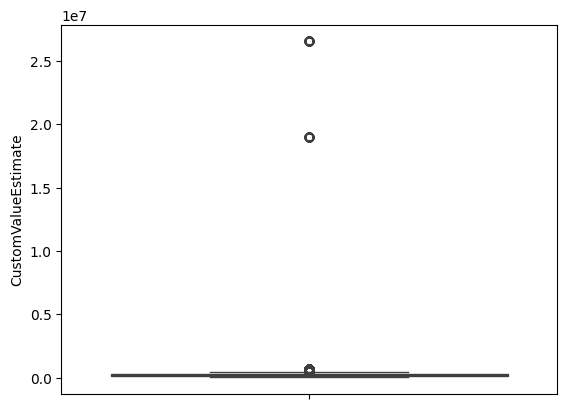

In [14]:
data_prep.check_outlier(df, "CustomValueEstimate")

Custom value Estimate have outlier , let's use the 90% percentile data

In [15]:
print( "max value" , df["CustomValueEstimate"].max())
upper_bound = df["CustomValueEstimate"].quantile(0.9)
df = df[df["CustomValueEstimate"] <= upper_bound]

max value 26550000.0


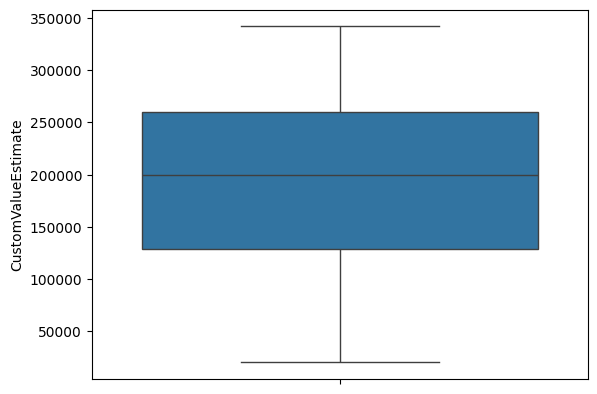

In [16]:
data_prep.check_outlier(df, "CustomValueEstimate")

<Axes: ylabel='TotalClaims'>

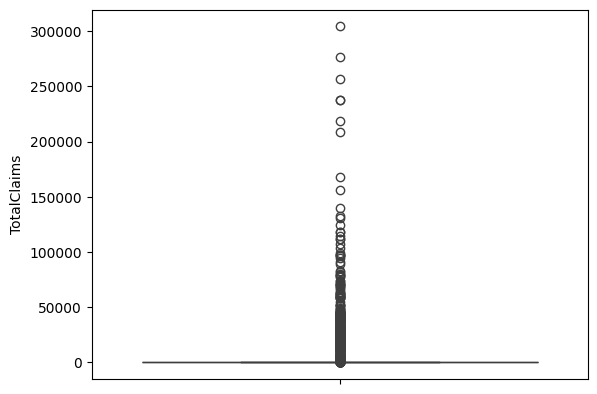

In [17]:
sns.boxplot(df["TotalClaims"])

In [18]:
df["TotalClaims"].describe()

count    198485.000000
mean         68.563870
std        2338.580874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      304338.657895
Name: TotalClaims, dtype: float64

In [19]:
df.isnull().sum().sort_values(ascending=False)

NumberOfVehiclesInFleet     198485
CrossBorder                 198485
Converted                    79658
WrittenOff                   79658
Rebuilt                      79658
LossRatio                    57312
Bank                         30016
AccountType                  14508
MaritalStatus                 2038
Gender                        2038
IsVATRegistered                  0
Citizenship                      0
Country                          0
Province                         0
PostalCode                       0
TransactionMonth                 0
PolicyID                         0
Language                         0
Title                            0
LegalType                        0
UnderwrittenCoverID              0
RegistrationYear                 0
VehicleType                      0
mmcode                           0
ItemType                         0
SubCrestaZone                    0
MainCrestaZone                   0
kilowatts                        0
make                

In [20]:
data_prep.handel_missing_value(df)

List of columns to drop that has more than 50% null values
198485
NumberOfVehiclesInFleet
198485
CrossBorder


In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum().sort_values(ascending=False)

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

<Axes: xlabel='Frequencey', ylabel='ExcessSelected'>

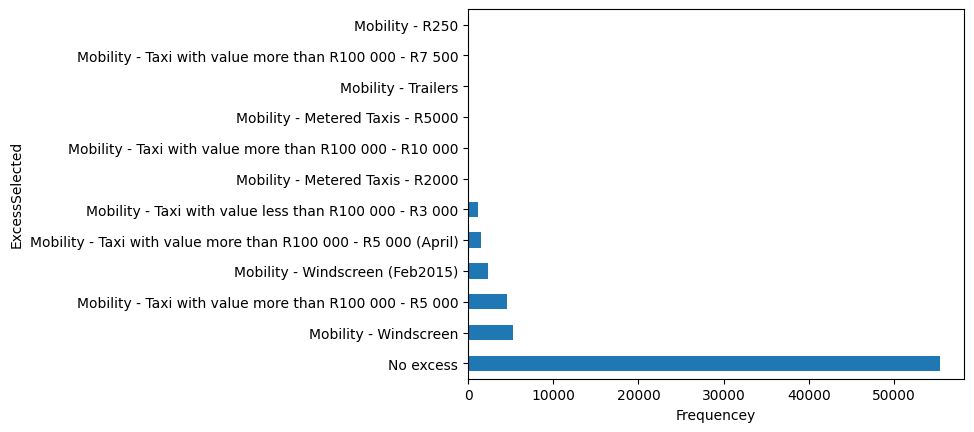

In [23]:
df["ExcessSelected"].value_counts().plot(kind="barh" , xlabel="Frequencey")

<Axes: xlabel='LossRatio', ylabel='ExcessSelected'>

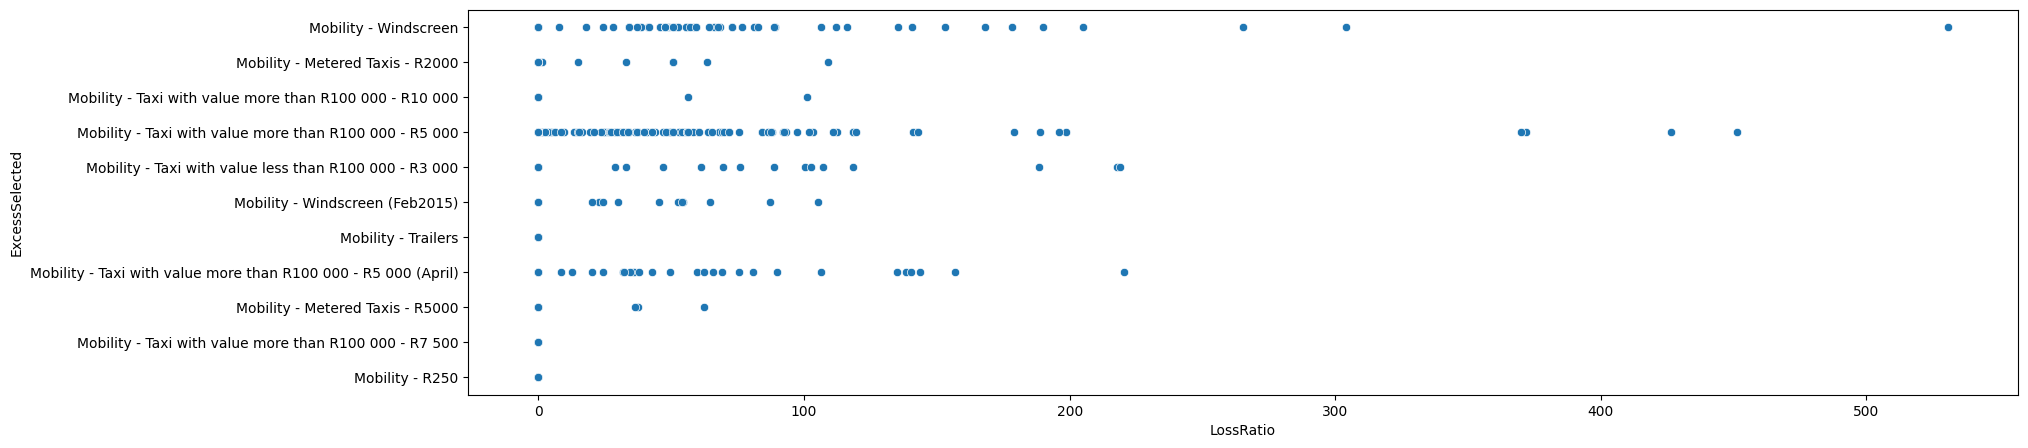

In [24]:
plt.figure(figsize=(20,5))
sns.scatterplot(x = df["LossRatio"] ,  y= df[ df["ExcessSelected"] != "No excess"]["ExcessSelected"])

<Axes: ylabel='Gender'>

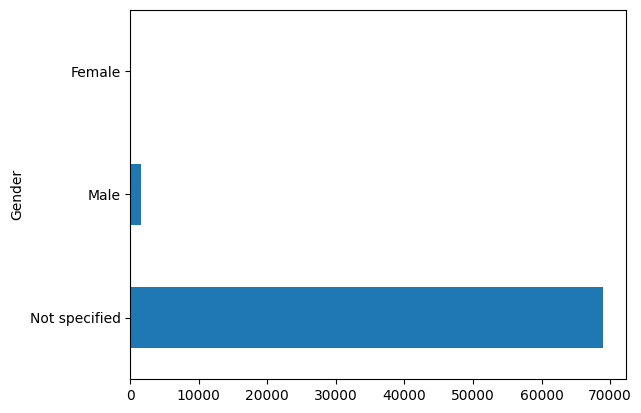

In [25]:
df["Gender"].value_counts().plot(kind="barh")

Total Premium vs another variables

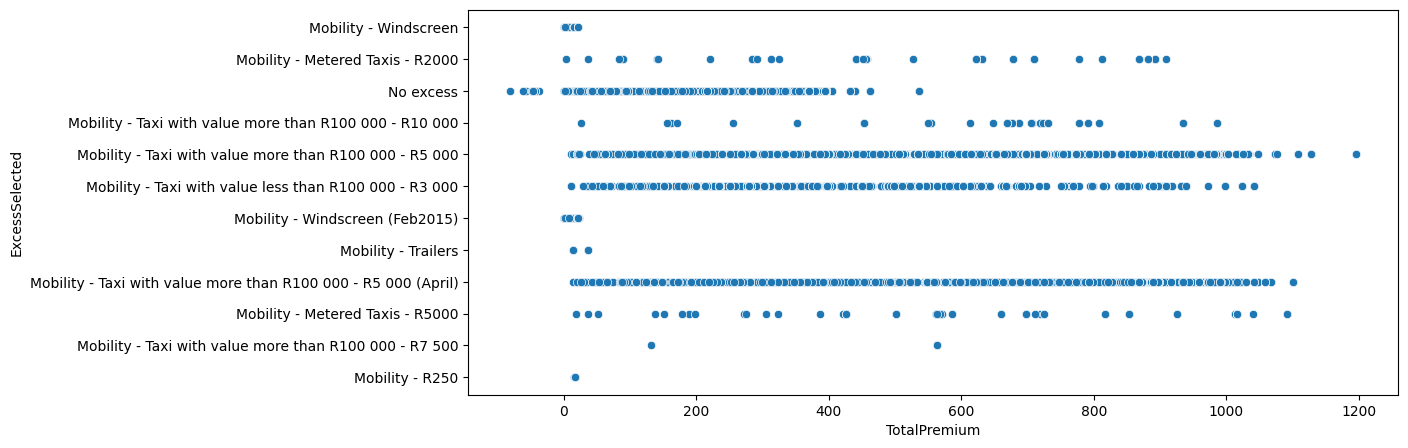

In [26]:
data_prep.compare_bivariant(df , "ExcessSelected" , "TotalPremium" )

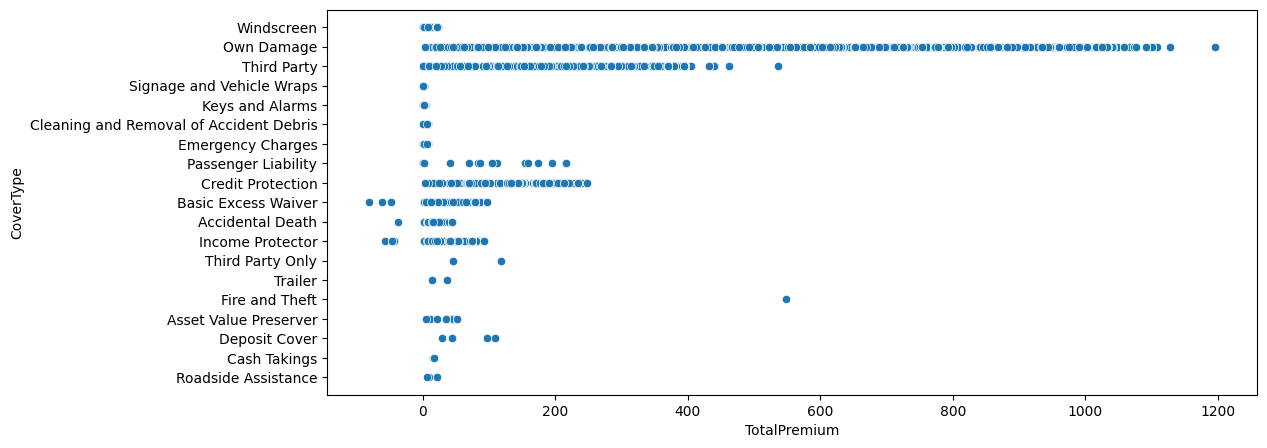

In [27]:
 data_prep.compare_bivariant(df ,"CoverType" ,"TotalPremium")

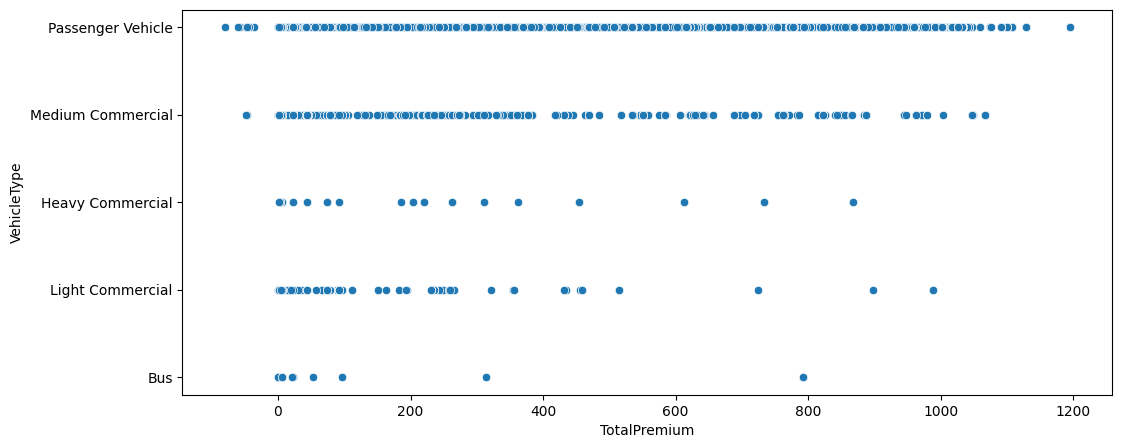

In [28]:
data_prep.compare_bivariant(df , "VehicleType" , "TotalPremium")

Total Ratio vs another variable"

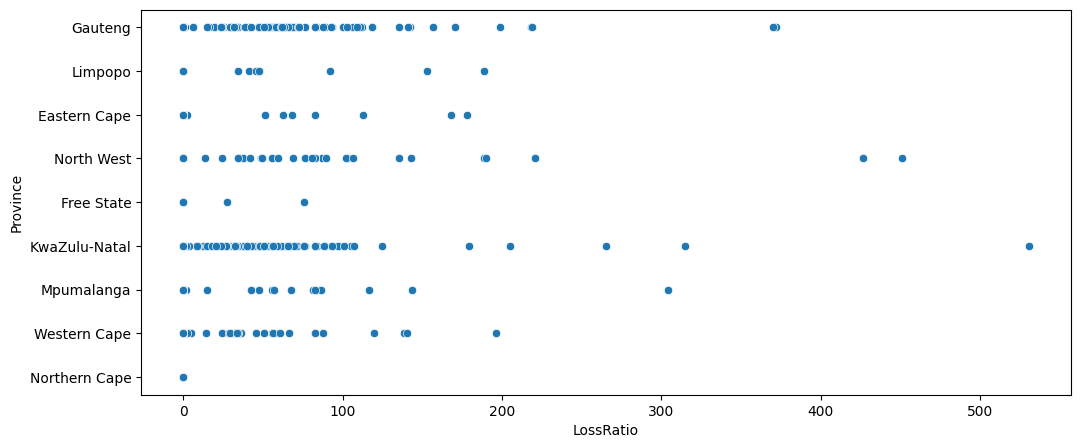

In [29]:
data_prep.compare_bivariant(df , "Province" , "LossRatio")

<Axes: xlabel='Province', ylabel='LossRatio'>

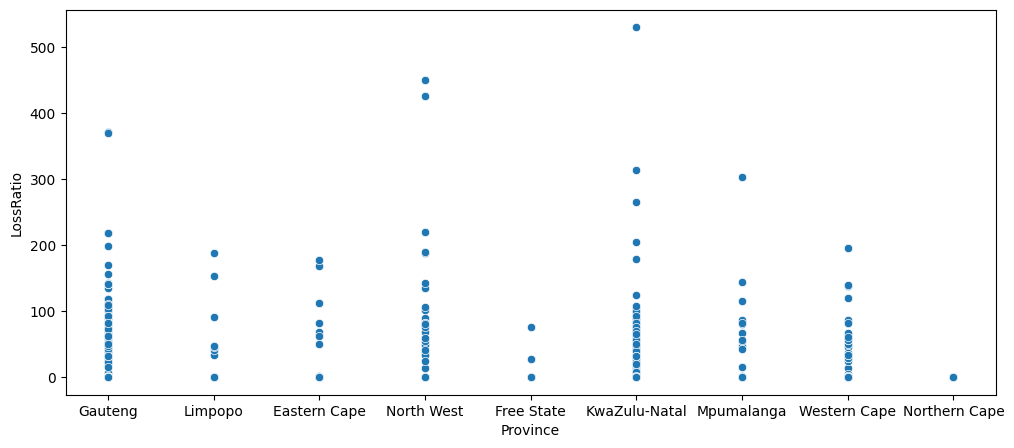

In [30]:
plt.figure(figsize=(12,5))
sns.scatterplot(y = df["LossRatio"] ,  x= df["Province"]  )

<Axes: xlabel='VehicleType', ylabel='LossRatio'>

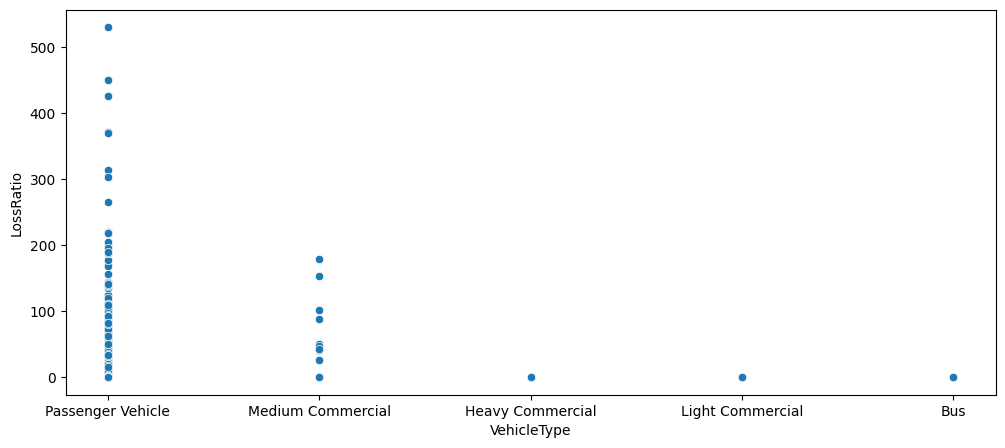

In [31]:
plt.figure(figsize=(12,5))
sns.scatterplot(y = df["LossRatio"] ,  x= df["VehicleType"]  )

<Axes: xlabel='Gender', ylabel='LossRatio'>

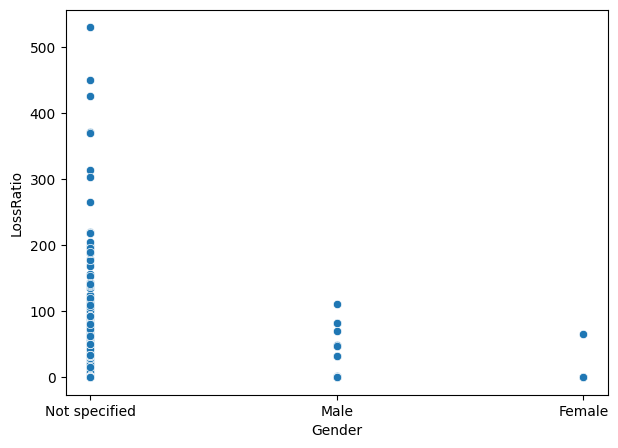

In [32]:
plt.figure(figsize=(7,5))
sns.scatterplot(y = df["LossRatio"] ,  x= df["Gender"]  )

<Axes: xlabel='TotalPremium', ylabel='Province'>

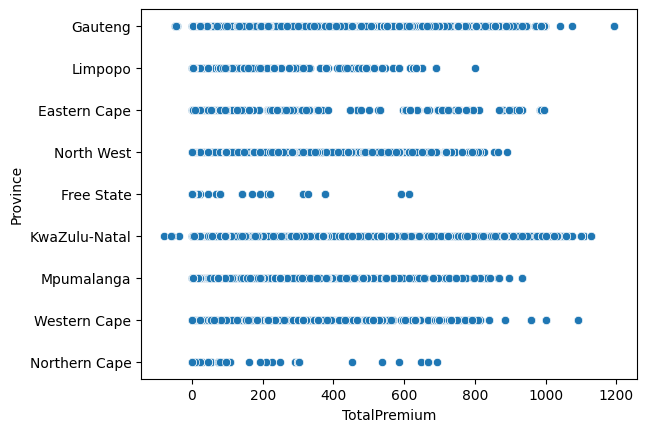

In [34]:
sns.scatterplot(y = df["Province"] ,  x= df["TotalPremium"]  )

<Axes: xlabel='TotalClaims', ylabel='Province'>

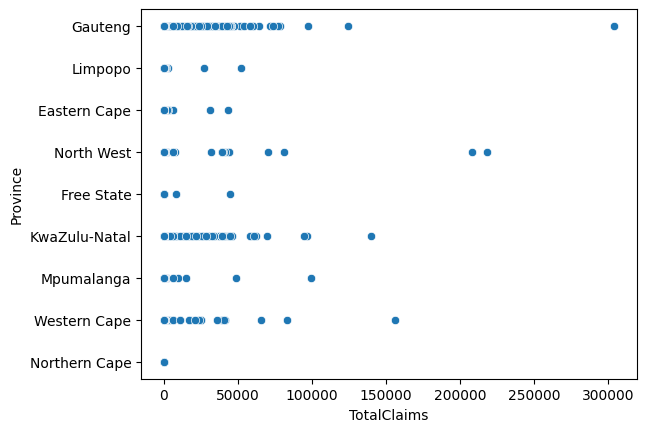

In [35]:
sns.scatterplot(y = df["Province"] ,  x= df["TotalClaims"]  )

<Axes: xlabel='TotalClaims', ylabel='CoverType'>

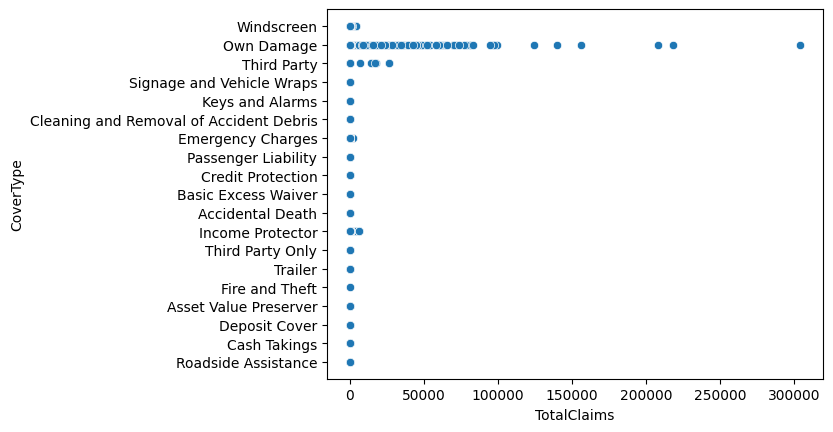

In [36]:
sns.scatterplot(y = df["CoverType"] ,  x= df["TotalClaims"]  )

<Axes: xlabel='TotalPremium', ylabel='CoverType'>

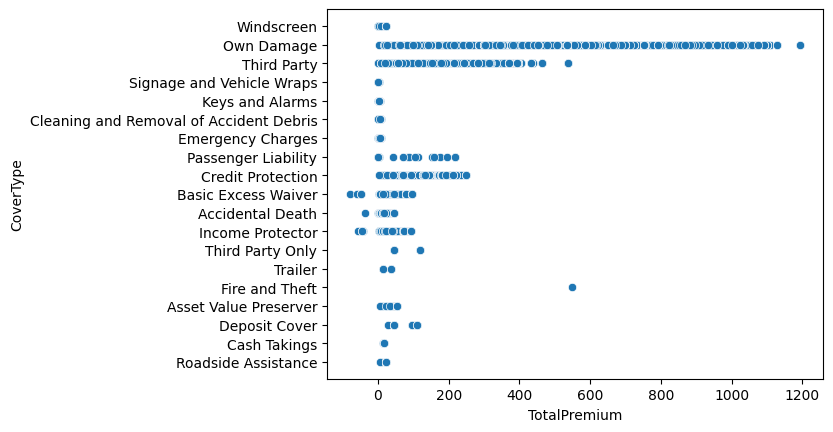

In [37]:
sns.scatterplot(y = df["CoverType"] ,  x= df["TotalPremium"]  )

<Axes: xlabel='TotalClaims', ylabel='VehicleType'>

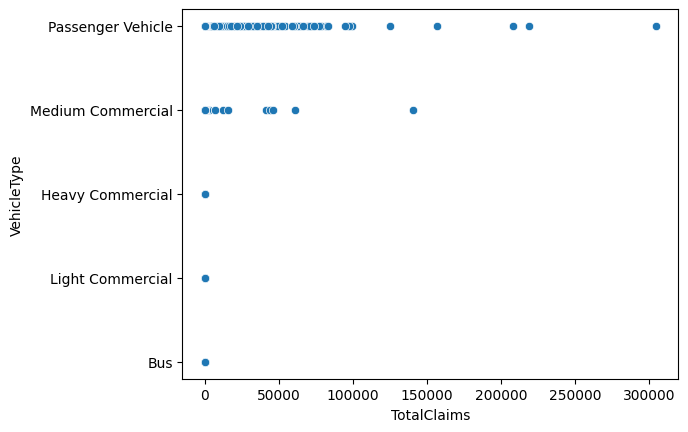

In [38]:
sns.scatterplot(y = df["VehicleType"] ,  x= df["TotalClaims"]  )

<Axes: xlabel='TotalPremium', ylabel='VehicleType'>

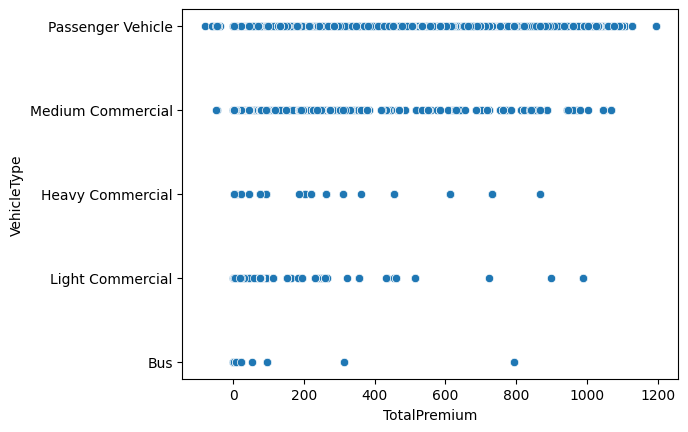

In [39]:
sns.scatterplot(y = df["VehicleType"] ,  x= df["TotalPremium"]  )

In [40]:
df["Province"].value_counts()

Province
Gauteng          25039
KwaZulu-Natal    16958
Western Cape     10757
North West        9490
Mpumalanga        3123
Eastern Cape      2418
Limpopo           2292
Free State         294
Northern Cape      202
Name: count, dtype: int64

<Axes: xlabel='CoverType'>

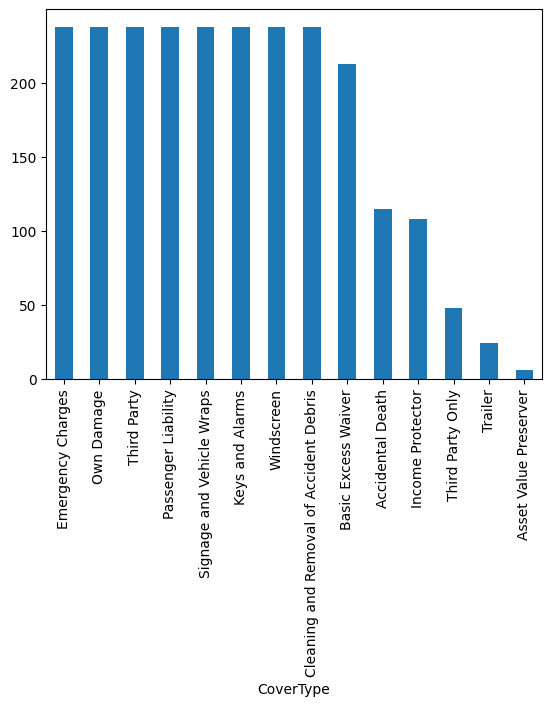

In [41]:
df[df["Province"] == "Eastern Cape"]["CoverType"].value_counts().plot(kind="bar")

In [42]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio'],
      dtype='object')


In [43]:
df["VehicleType"].value_counts()

VehicleType
Passenger Vehicle    67055
Medium Commercial     2822
Light Commercial       507
Heavy Commercial       162
Bus                     27
Name: count, dtype: int64

In [44]:
df["PostalCode"].value_counts()

PostalCode
2000    9622
7405    5016
122     2246
4360    2110
299     1361
        ... 
1575       8
1501       8
356        8
371        8
340        8
Name: count, Length: 338, dtype: int64

In [49]:
import pandas as pd
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

In [50]:
df["Month"] = df["TransactionMonth"].dt.month

In [51]:
df["CoverType"].value_counts()

CoverType
Own Damage                                 7553
Passenger Liability                        7553
Windscreen                                 7542
Third Party                                7495
Signage and Vehicle Wraps                  7494
Cleaning and Removal of Accident Debris    7494
Keys and Alarms                            7494
Emergency Charges                          7494
Basic Excess Waiver                        3983
Income Protector                           3812
Accidental Death                           2183
Credit Protection                           283
Third Party Only                             48
Deposit Cover                                44
Asset Value Preserver                        44
Roadside Assistance                          28
Trailer                                      24
Cash Takings                                  4
Fire and Theft                                1
Name: count, dtype: int64

In [52]:
df.sort_values(by="TransactionMonth" , inplace=True)

In [53]:
# Calculate monthly change (diff) per ZipCode
df['PremiumChange'] = df.groupby("PostalCode")['TotalPremium'].diff()
df['ClaimChange'] = df.groupby('PostalCode')['TotalClaims'].diff()

In [54]:
# Filter rows with no missing values
clean_df = df.dropna(subset=['PremiumChange', 'ClaimChange'])

# Compute correlation per ZipCode
zip_corrs = clean_df.groupby('PostalCode')[['PremiumChange', 'ClaimChange']].corr().unstack().iloc[:, 1]

# View correlations
print(zip_corrs)

PostalCode
1            NaN
8            NaN
29           NaN
44      0.250819
46           NaN
          ...   
8570         NaN
9323    0.453974
9431         NaN
9499    0.364361
9745         NaN
Name: (PremiumChange, ClaimChange), Length: 338, dtype: float64


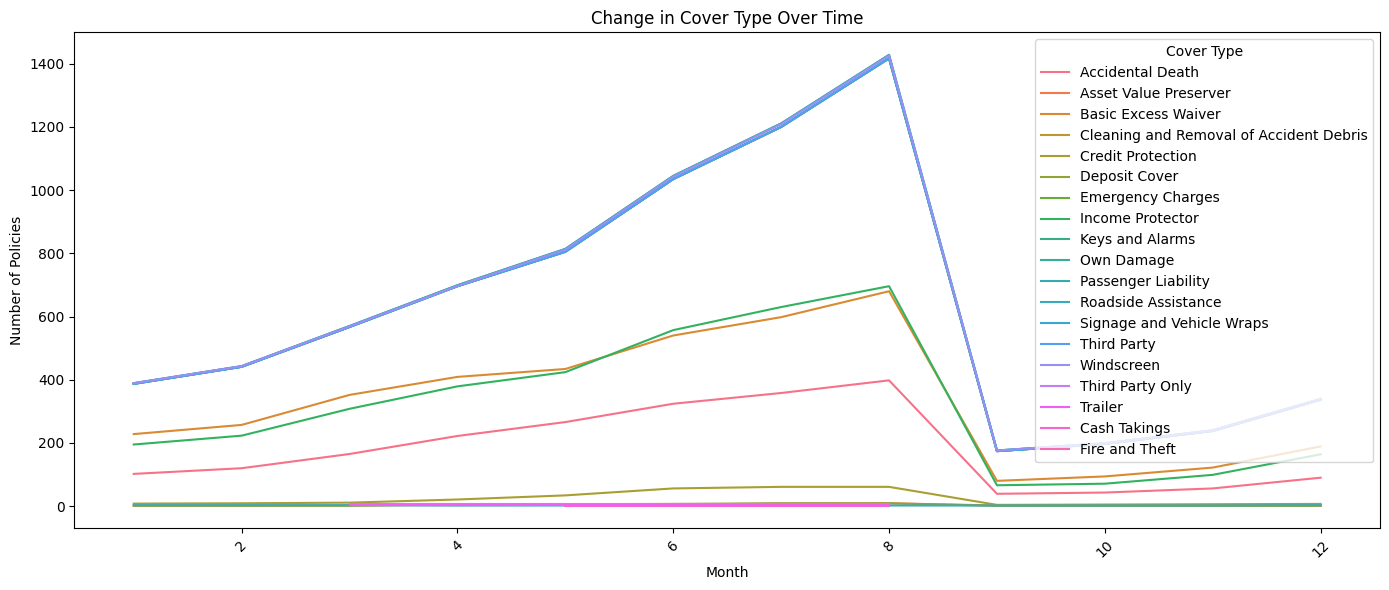

In [55]:
# Assuming df has columns: 'Month', 'ZipCode', 'CoverType'
df_grouped = df.groupby(['Month', 'CoverType']).size().reset_index(name='Count')

plt.figure(figsize=(14,6))
sns.lineplot(data=df_grouped, x='Month', y='Count', hue='CoverType')
plt.title("Change in Cover Type Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Policies")
plt.legend(title="Cover Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


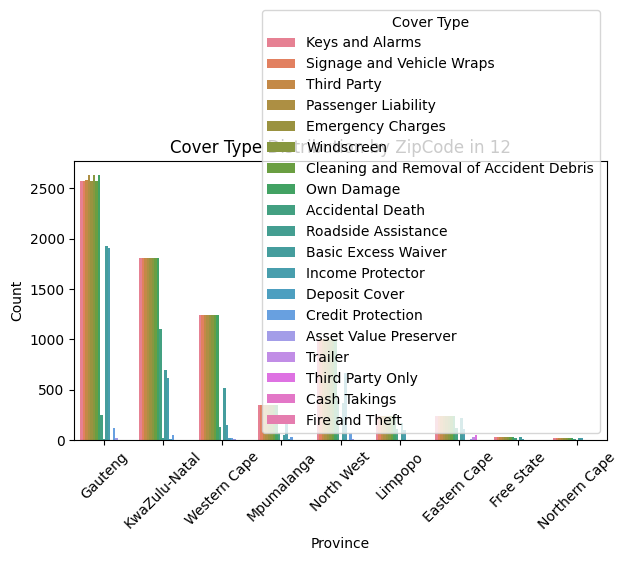

In [56]:
latest_month = df['Month'].max()
df_latest = df[df['Month'] == latest_month]
plt.Figure(figsize=(12,6))
sns.countplot(data=df, x='Province', hue='CoverType')
plt.title(f"Cover Type Distribution by ZipCode in {latest_month}")
plt.xlabel("Province")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Cover Type")
plt.tight_layout()
plt.show()

In [57]:
df.to_csv("../src/data/cleaned_data.csv", index=False)